### Tables of Content

#### Linear Algebra Tools

1. Operator Matrices
    - Pauli: I, X, Y, Z
    - Hadamard: H
    - Phase: P
    - Sqrt(X): SX
    - Sqrt(Z): S
    - Sqrt(H): SH
    - 4rt (Z): T
    - X root: Xrt(s)
    - H root: Hrt(s)
    - Rotation Matrices: Rx($\theta$), Ry($\theta$), Rz($\theta$)
    - U3 Matrix: U3($\theta, \phi, \lambda$)
    - Controlled-Not: CX
    
</br>

2. Common Statevectors
    - $|0\rangle$: zero
    - $|1\rangle$: one
    - $|+\rangle$: plus
    - $|-\rangle$: minus
    - $| \uparrow \rangle$: up
    - $| \downarrow \rangle$: down
    - Bell States: B00, B01, B10, B11
  
</br>

3. Lambda Methods
    - ndarray to list: to_list(array)
    - tensor: *****initial_state
    - matmul: *****initial_state
    
</br>
    
4. Full Methods
    - Calculate Hermitian Conjugate: dagger(mat)
    - Build CU matrix: cu_matrix(no_qubits, control, target, U, little_edian)
    - Find RX, RY for arbitrary U3: angles_from_state_vectors(output_statevector)
    
</br>

5. Visualizations
    - view(mat, rounding = 10)


#### Qiskit Tools

1. Linear Algebra
    - Short-hand QC: q(*****regs, name=None, global_phase=0)
    - Multi-controlled Unitary: control_unitary(circ, unitary, *****controls, target)
    - Control Phase: control_phase(circ, angle, control_bit, target_bit, recip=True, pi_on=True)

</br>

2. Visualizations
    - Draw Circuit: milk(circ)
    - Draw Transpiled Circuit: dtp(circ, print_details = True, visual = True, return_values = False)
    - Get Unitary / Statevector Function: get(circ, types = 'unitary', nice = True)
    - Displaying Histogram / Bloch / Counts: sim(circ, visual = 'hist')
    
</br>

3. Toffoli Optimizaton Specific
    - Unitary Checker: unitary_check(test_unitary)
    - Multi-Hadamard Composition: h_relief(n, no_h)

### Import

In [2]:
import numpy as np
import sympy as sp
from sympy.solvers.solveset import linsolve

import matplotlib
import matplotlib.pyplot as plt 
matplotlib.use('Agg')

from sympy import Matrix, init_printing

import qiskit
from qiskit import *
from qiskit.aqua.circuits import *

# Representing Data
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector

# Monitor Job on Real Machine
from qiskit.tools.monitor import job_monitor

from functools import reduce # perform sucessive tensor product

# Calculating cost
from sklearn.metrics import mean_squared_error

# Generating random unitary matrix
from scipy.stats import unitary_group

# Measure run time
import time

# Almost Equal
from numpy.testing import assert_almost_equal as aae

Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc' line #2.
Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc' line #3.


### Linear Algebra Tools

In [3]:
# Matrices
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
H = 1/np.sqrt(2)*np.array([[1, 1], [1, -1]])
P = lambda theta: np.array([[1, 0], [0, np.exp(1j*theta)]])

# sqrt(X)
SX = 1/2 * np.array([[1+1j, 1-1j], [1-1j, 1+1j]])

# sqrt(Z)
S = np.array([[1, 0], [0, 1j]])

# sqrt(H)
SH = (1j/4-1/4)*np.array([[np.sqrt(2) + 2j, np.sqrt(2)], [np.sqrt(2), -np.sqrt(2)+2j]])

# 4th root of Z
T = np.array([[1, 0], [0, 1/np.sqrt(2) + 1/np.sqrt(2)*1j]])

# X power
Xp = lambda t: 1/2 * np.array([[1, 1], [1, 1]]) + np.exp(1j*np.pi*t)/(2) * np.array([[1, -1], [-1, 1]])

# H power
Hp = lambda t: np.exp(-1j*np.pi*t/2) * np.array([[np.cos(np.pi*t/2) + 1j/np.sqrt(2)* np.sin(np.pi*t/2), 1j/np.sqrt(2) * np.sin(np.pi*t/2)], 
                                                   [1j/np.sqrt(2) * np.sin(np.pi*t/2), np.cos(np.pi*t/2)-1j/np.sqrt(2)* np.sin(np.pi*t/2)]])

CX = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

# Rn Matrix Function
Rx = lambda theta: np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]])
Ry = lambda theta: np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
Rz = lambda theta: np.array([[np.exp(-1j*theta/2), 0], [0, np.exp(1j*theta/2)]])

# U3 Matrix
U3 = lambda theta, phi, lam: np.array([[np.cos(theta/2), -np.exp(1j*lam)*np.sin(theta/2)], 
                                       [np.exp(1j*phi)*np.sin(theta/2), np.exp(1j*lam + 1j*phi)*np.cos(theta/2)]])

# Eigenvectors of Pauli Matrices
zero = np.array([[1], [0]]) # Z plus basis state
one = np.array([[0], [1]]) # Z plus basis state

plus = np.array([[1], [1]])/np.sqrt(2) # X plus basis state
minus = np.array([[1], [-1]])/np.sqrt(2) # X minus basis state

up = np.array([[1], [1j]])/np.sqrt(2) # Y plus basis state
down = np.array([[1], [-1j]])/np.sqrt(2) # Y plus basis state

# Bell States
B00 = np.array([[1], [0], [0], [1]])/np.sqrt(2) # Bell of 00
B01 = np.array([[1], [0], [0], [-1]])/np.sqrt(2) # Bell of 01
B10 = np.array([[0], [1], [1], [0]])/np.sqrt(2) # Bell of 10
B11 = np.array([[0], [-1], [1], [0]])/np.sqrt(2) # Bell of 11

# ndarray to list
to_list = lambda array: list(np.squeeze(array))

# Tensor Product of 2+ matrices/ vectors
tensor = lambda *initial_state: reduce(lambda x, y: np.kron(x, y), initial_state)

# Matrix Multiplicaton of 2+ matrices / vectors
mat_mul = lambda *initial_state: reduce(lambda x, y: np.dot(x, y), initial_state)

###### Calculate Hermitian Conjugate

In [4]:
def dagger(mat):
    
    # Calculate Hermitian conjugate
    mat_dagger = np.conj(mat.T)
    
    # Assert Hermitian identity
    aae(np.dot(mat_dagger, mat), np.identity(mat.shape[0]))
    
    return mat_dagger

###### CU Matrix

In [5]:
def cu_matrix(no_qubits, control, target, U, little_edian = True):
    
    """
    Manually build the unitary matrix for non-adjacent CX gates
    
    Parameters:
    -----------
    no_qubits: int
        Number of qubits in the circuit
    control: int
        Index of the control qubit (1st qubit is index 0)
    target: int
        Index of the target qubit (1st qubit is index 0)
    U: ndarray
        Target unitary matrix
    edian: bool (True: qiskit convention)
        Qubits order convention
        
    Returns:
    --------
    cx_out:
        Unitary matrix for CU gate
    """
    
    left = [I]*no_qubits
    right = [I]*no_qubits
    
    left[control] = np.dot(zero, zero.T)
    right[control] = np.dot(one, one.T)

    right[target] = U

    if little_edian:
        cx_out = tensor(*reversed(left)) + tensor(*reversed(right))
    else:
        cx_out = tensor(*left) + tensor(*right)
    
    # This returns a unitary in qiskit 'little eddian', to switch back, simply switch the target for control
          
    return cx_out

###### Angles from Statevector

In [6]:
def angles_from_statevectors(output_statevector):
    
    """
    Calculate correct x, y rotation angles from an arbitrary output statevector
    
    Paramters:
    ----------
    output_statevector: ndarray
        Desired output state
        
    Returns:
    --------
    phi: float
        Angle to rotate about the y-axis [0, 2pi)
    theta: float
        Angle to rotate about the x-axis [0, 2pi)
    
    """
    
    # Extract the components
    x, z = output_statevector.real
    y, w = output_statevector.imag
    
    # Calculate the correct angles
    phi = 2*np.arctan2(z,x)[0]
    theta = 2*np.arctan2(y,z)[0]
    
    print(f'phi: {phi}')
    print(f'theta: {theta}')
    
    return phi, theta

###### View Matrix

In [7]:
def view(mat, rounding = 10):
    display(Matrix(np.round(mat, rounding)))

### Qiskit Tools

###### Short-hand Qiskit Circuit

In [8]:
q = lambda *regs, name=None, global_phase=0: QuantumCircuit(*regs, name=None, global_phase=0)

###### Controlled Unitary

In [9]:
def control_unitary(circ, unitary, controls, target):
    
    """
    Composed a multi-controlled single unitary target gate
    
    Parameters:
    -----------
    circ: QuantumCircuit
        Qiskit circuit of appropriate size, no less qubit than the size of the controlled gate
    unitary: ndarray of (2, 2)
        Unitary operator for the target qubit
    controls: list
        Indices of controlled qubit on the original circuit
    target: int
        Index of target bit
    
    
    Returns:
    --------
    new_circ: QuantumCircuit
        Composed circuit with unitary target
    """

    # Get info about circuit parameters
    
    no_controls = len(controls)
    unitary_size = np.log2(len(unitary))


    # Build unitary circuit

    qc = QuantumCircuit(unitary_size)
    qc.unitary(unitary, range(int(unitary_size)))
    qc = qc.control(no_controls)

    # Composed the control part in the circuit

    new_circ = circ.compose(qc, (*controls, target))
    
    return new_circ

##### Controlled Phase

In [10]:
def control_phase(circ, angle, control_bit, target_bit, recip = True, pi_on = True):
    
    """
    Add a controlled-phase gate
    
    Parameters:
    -----------
    circ: QuantumCircuit
        Inputted circuit
        
    angle: float
        Phase Angle
    
    control_bit: int
        Index of control bit
    
    target_bit: int
        Index of target bit
        
    recip: bool (True)
        Take the reciprocal of the angle
        
    pi_on: bool (True)
        Multiply pi to the angle
        
    Returns:
    --------
    circ: QuantumCircuit
        Circuit with built-in CP
    
    """
    
    if recip:
        angle = 1/angle
    if pi_on:
        angle *=np.pi
        
    
    circ.cp(angle, control_bit, target_bit)
    
    return circ

###### Draw Circuit

In [11]:
def milk(circ):
    return circ.draw('mpl')

###### Draw Transpiled Circuit

In [12]:
def dtp(circ, print_details = True, nice = True, return_values = False):
    
    """
    Draw and/or return information about the transpiled circuit
    
    Parameters:
    -----------
    circ: QuantumCircuit
        QuantumCircuit to br transpiled
    print_details: bool (True)
        Print the number of u3 and cx gates used
    nice: bool (True)
        Show the transpiled circuit
    return_values: bool (True)
        Return the number of u3 and cx gates used
        
    Returns:
    --------
    no_cx: int
        Number of cx gates used
    no_u3: int
        Number of u3 gates used
    
    """
    
    # Transpile Circuit
    circ = transpile(circ, basis_gates= ['u3', 'cx'], optimization_level=3)

    # Count operations
    gates = circ.count_ops()

    # Compute cost
    try:
        no_u3 = gates['u3']
    except:
        no_u3 = 0
        
    try:
        no_cx = gates['cx']
    except:
        no_cx = 0
    
    cost = no_u3 + 10*no_cx

    if print_details:
        # Print Circuit Details
        print(f'cx: {no_cx}')

        print(f'u3: {no_u3}')
        print(f'Total cost: {cost}')
    
    if nice:
        return circ.draw('mpl')
    
    if return_values:
        return no_cx, no_u3

###### Get Unitary/StateVector Function

In [13]:
def get(circ, types = 'unitary', nice = True):
    
    """
    This function return the statevector or the unitary of the inputted circuit
    
    Parameters:
    -----------
    circ: QuantumCircuit
        Inputted circuit without measurement gate
    types: str ('unitary')
        Get 'unitary' or 'statevector' option
    nice: bool
        Display the result nicely option or just return unitary/statevector as ndarray
        
    Returns:
    --------
    out: ndarray
        Outputted unitary of statevector
        
    """
    
    if types == 'statevector':
        backend = BasicAer.get_backend('statevector_simulator')
        out = execute(circ, backend).result().get_statevector()
    else: 
        backend = BasicAer.get_backend('unitary_simulator')
        out = execute(circ, backend).result().get_unitary()
        
    if nice:
        display(Matrix(np.round(out, 10))) 
    else:
        return out

###### Displaying Histogram / Bloch / Counts

In [14]:
def sim(circ, visual = 'hist'):
    
    """
    Displaying output of quantum circuit
    
    Parameters:
    -----------
    circ: QuantumCircuit
        QuantumCircuit with or without measurement gates
    visual: str ('hist')
        'hist' (counts on histogram) or 'bloch' (statevectors on Bloch sphere) or None (get counts only)
        
    Returns:
    --------
    counts: dict
        Counts of each CBS state
    """
    
    # Simulate circuit and display counts on a histogram
    if visual == 'hist':
        simulator = Aer.get_backend('qasm_simulator')
        results = execute(circ, simulator).result()
        counts = results.get_counts(circ)
        plot_histogram(counts)
        
        return counts
        
    # Get the statevector and display on a Bloch sphere
    elif visual == 'bloch':
        backend = BasicAer.get_backend('statevector_simulator')
        statevector = execute(circ, backend).result().get_statevector()
        get(circ)
        plot_bloch_multivector(statevector)
        
    # Just get counts
    else:
        simulator = Aer.get_backend('qasm_simulator')
        results = execute(circ, simulator).result()
        counts = results.get_counts(circ)
        
        return counts

###### Unitary Checker

In [15]:
def unitary_check(test_unitary, perfect = False):
    
    """
    Check if the CnX unitary is correct
    
    Parameters:
    -----------
    test_unitary: ndarray
        Unitary generated by the circuit
    perfect: ndarray
        Account for phase difference
        
    """
    
    # Get length of unitary

    if not perfect:
        test_unitary = np.abs(test_unitary)
        
    size = test_unitary.shape[0]
    
    cx_theory = np.identity(size)

    # Change all the difference
    cx_theory[int(size/2) - 1, size - 1] = 1
    cx_theory[size - 1, int(size/2) - 1] = 1
    cx_theory[int(size/2) -1, int(size/2) -1] = 0
    cx_theory[size - 1, size - 1] = 0

    # Assert Similarity
    aae(cx_theory, test_unitary)
    
    print('Unitary is correct')

# Task: Implementing Improved Multiple Controlled Toffoli

### Abstract

Multiple controlled Toffoli gates are crucial in the implementation of modular exponentiation [4], like that used in Shor's algorithm. In today's practical realm of small number of qubits devices, there is a real need for efficient realization of multiple controlled Toffoli gate for 6 to 10 controls.

Shende and Markov proved that the implementation of the $n$-qubit analogue of the $TOFFOLI$ requires at least $2n \ CNOT$ gates [1]. Currently, the best known upper bound is outlined by Maslov stands at $6n-12$ with the used of $\lceil \frac{n-3}{2} \rceil$ ancilla bits [2]. For implementaion without ancillae, we look at the technique outlined in Corollary 7.6 which has $\Theta(n^2)$ complexity [3]. The aboved mention technique however, still has a high implementation cost for relatively low number of controls. This is due to the high coefficient of the $n^2$ term.  

Note that in this notebook, $n$ qubits Toffli gates will simply be referred to as $CnX$ gate where $n$ is the number of control bits.

For this project, we outline a technique for building $CnX$ gate with modulo phase shift whose unitary satisfies $UU = I$. For a few examples from $n = 2$ to $n = 15$, we provided some values to compare and contrast our circuit cost versus that of qiskit. We then postulated with high confidence the complexity of the technique to be $O(2^{\frac{n}{2}})$. Comparing this to the quadratic technique in Corollary 7.6 of [3], we found that our circuits are superior for $n = 7, 8, ..., 11$ . At the end, we offers some possible implementation cases for our technique.

### Motivating the General Circuit

The general $CnX$ gate takes in $n+1$ qubits as inputs ($n$ controls, $1$ target). It's action on a set of qubits $\{q_i\}_{i = 0}^{n}$ is defined as followed.

$$CnX(\{q_i\}_{i = 0}^{n}) = \big{(} \bigwedge_{i = 0}^{n-1} q_i \big{)} \oplus q_n$$

Simply stated, the gate flips the target bit if all the controls are $1$s. For example, for $n = 2$, we have the well-known Toffoli gate

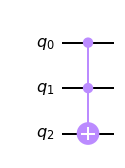

In [46]:
circ = q(3)
circ.ccx(0, 1, 2)
milk(circ)

And for higher $n$, $6$ for example, the circuit would take this form.

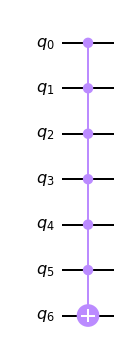

In [47]:
circ = q(7)
circ.mct(list(range(6)), 6)
milk(circ)

The cost for the Qiskit implementation of $CnX$ gate from $n = 2$ to $n = 11$ are listed above in terms of the basic operations ($CX$ and $U3$). Note that the general cost is defined as $10CX + U3$.

n | CX | U3 | General Cost 
--- | --- | --- | --- 
2 | 6 | 8 | 68 
3 | 20 | 22 | 222
4 | 44 | 46 | 486
5 | 92 | 94 | 1014
6 | 188 | 190 | 2070
7 | 380 | 382 | 4182
8 | 764 | 766 | 8406
9 | 1532 | 1534 | 16854
10 | 3068 | 3070 | 33750
11 | 6140 | 6142 | 67542

As outlined in Corolllary 7.1 [3]. The number of $CX$ grows by $3\cdot 2^{n-1} - 4$, and $U3$ grows by $3\cdot 2^{n-1} - 2$. Overall, we see an $O(2^n)$ complexity of the general cost.

Our technique takes advantage of the superposition identity that

$$H Z H = X$$

For an arbitrary $CnX$, we split the control into two groups (one controlled by $H$, and one controlled by $Z$). If we defined the number of control bits on the $H$ gates as $a$, we have the circuit $C(a)H - C(n-a)Z - C(a)H$. An example of $n = 7, a = 3$ is shown below.

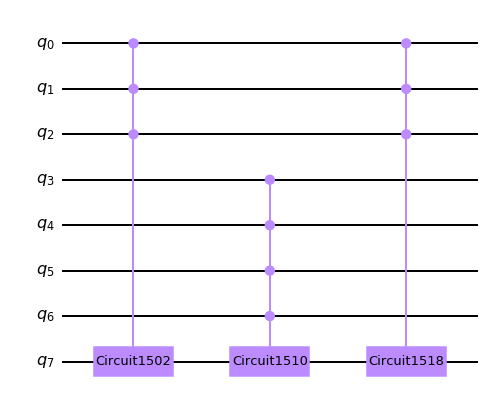

In [49]:
circ = q(8)
circ = control_unitary(circ, H, [0, 1, 2], 7)
circ = control_unitary(circ, Z, [3, 4, 5, 6], 7)
circ = control_unitary(circ, H, [0, 1, 2], 7)

milk(circ)

The two outer most gates are $C3H$, and the middle gate is $C4Z$. Together they create $C7X$ with a negative phase in 7 columns of the unitary. In general, the number of negative phase in the unitary has the form $2^a - 1$. Although $a$ can be varied, for each $n$, there exists a unique value of $a$ that is optimal for the respective circuit. We run and tested out all the different combination of $n$s and $a$s. And we generate the set of opimal combinations shown below.

n | H-a | CX | U3 | General Cost 
--- | --- | --- | --- | --- 
2 | 1 | 3 | 4 | 34
3 | 1 | 6 | 7 | 67
4 | 1 | 20 | 25 | 225
5 | 2 | 34 | 53 | 393
6 | 2 | 50 | 72 | 572
7 | 3 | 70 | 101 | 801
8 | 4 | 102 | 143 | 1163
9 | 4 | 146 | 196 | 1656
10 | 4 | 222 | 286 | 2506
11 | 5 | 310 | 395 | 3495

### Implementing the General Circuit

The circuit will be implemented recursively using three base cases. When $n = 1$, when have the $CX$ gate. When $n = 2$, we have the below structure.

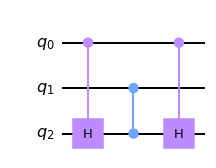

In [54]:
milk(CnX(2))

$n = 3$

cx: 6
u3: 7
Total cost: 67


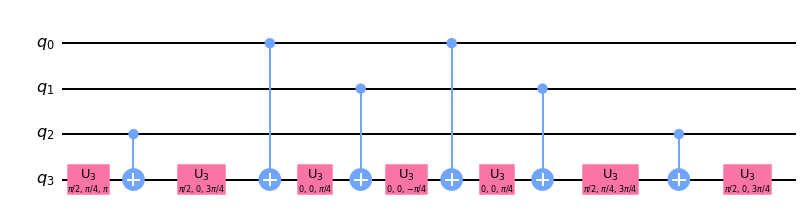

In [58]:
dtp(CnX(3))

We sketch the following for the general circuit of $CnX$

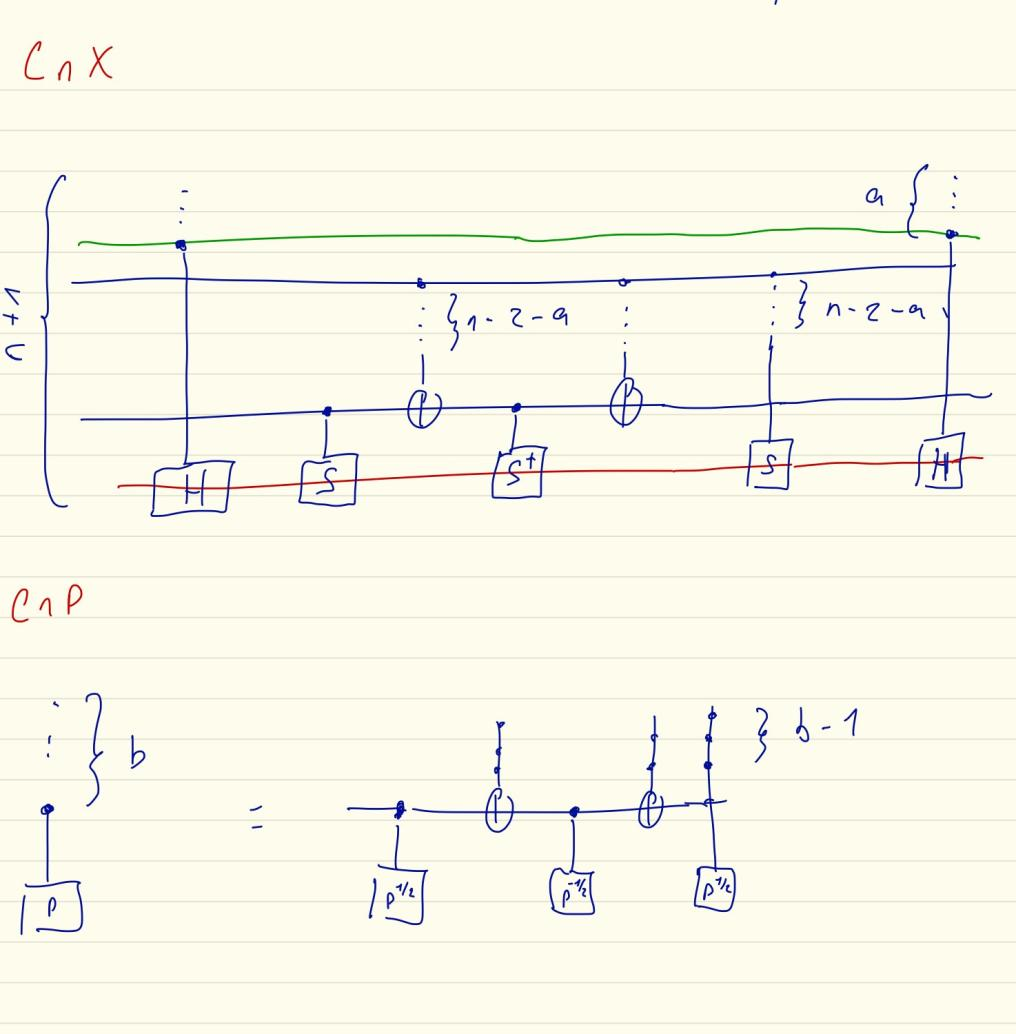

We also provide the qiskit code implementation of for the general $CnX$ below. At the end is the list of the best implementation for each CnX gate. To use, simply assign ```best[n] ``` to an object and use like a normal QuantumCircuit. Note that $n$ represents the number of controls in the desired $CnX$.

###### CnX/CnP (Multiple-controlled Not modulo phase shift circuit)

In [56]:
def CnX(n, control_list = None, target = None, circ = None, theta = 1):
    
    """
    Create a CnX modulo phase shift gate
    
    Parameters:
    -----------
    n: int
        Number of control bits
    control_list: list
        Index of control bits on inputted circuit (if any)
    target: int
        Index of control bits on inputted circuit (if any)
    circ: QuantumCircuit
        Inputted circuit to compose CnX on
    theta: int
        1/theta power X n-bit controlled circuit
        
    Returns:
    --------
    circ: QuantumCircuit
        CnX modulo phase shift gate
        
    """
    
    # Build New Circuit
    if circ == None:
        circ = q(n+1)
        control_list = list(range(n))
        target = n
    
    # Base Case
    if n == 1:
        
        circ.cx(*control_list, target)
        
        return circ
    
    if n==2:
        circ.ch(control_list[0], target)
        circ.cz(control_list[1], target)
        circ.ch(control_list[0], target)
        
        return circ
    
    if n == 3:
        circ.rcccx(*control_list, target)
        
        return circ
    
    # New Case
    
    # CH
    circ.ch(control_list[0], target)
    
    # CP2
    circ = control_phase(circ, theta*2, control_list[-1], target)
    
    # C(n-2)X
    circ = CnX(n-2, control_list[1:-1], control_list[-1], circ)
    
    # -CP2
    circ = control_phase(circ, -theta*2, control_list[-1], target)
    
    # C(n-2)X
    circ = CnX(n-2, control_list[1:-1], control_list[-1], circ)
    
    # CnP
    circ = CnP(n-2, control_list[1:-1], target, circ, theta*2)
    
    # CH
    circ.ch(control_list[0], target)
    
    return circ

def CnP(n, control_list = None, target = None, circ = None, theta = 1):
    
    """
    Create a CnP modulo phase shift gate
    
    Parameters:
    -----------
    n: int
        Number of control bits
    control_list: list
        Index of control bits on inputted circuit (if any)
    target: int
        Index of control bits on inputted circuit (if any)
    circ: QuantumCircuit
        Inputted circuit to compose CnP on
    theta: int
        1/theta power Z n-bit controlled circuit
        
    Returns:
    --------
    circ: QuantumCircuit
        CnP modulo phase shift gate
        
    """
    
    # Build New Circuit
    if circ == None:
        circ = q(n+1)
        control_list = list(range(n))
        target = n
    
    # Base Case
    if n ==1:
        circ = control_phase(circ, theta, control_list, target)
        
        return circ 
    
    # New Case
    
    # CP
    circ = control_phase(circ, theta*2, control_list[-1], target)
    
    # C(n-1)X
    circ = CnX(n-1, control_list[:-1], control_list[-1], circ)
    
    # -CP
    circ = control_phase(circ, -theta*2, control_list[-1], target)
    
    # C(n-1)X
    circ = CnX(n-1, control_list[:-1], control_list[-1], circ)
    
    # C(n-1)P
    circ = CnP(n-1, control_list[:-1], target, circ, theta*2)
    
    return circ

###### CnH / Multi-Hadamard Composition

In [59]:
def CnH(n, control_list = None, target = None, circ = None, theta = 1):
    
    """
    Create a CnH modulo phase shift gate
    
    Parameters:
    -----------
    n: int
        Number of control bits
    control_list: list
        Index of control bits on inputted circuit (if any)
    target: int
        Index of control bits on inputted circuit (if any)
    circ: QuantumCircuit
        Inputted circuit to compose CnH on
    theta: int
        1/theta power H n-bit controlled circuit
        
    Returns:
    --------
    circ: QuantumCircuit
        CnH modulo phase shift gate
        
    """
    
    # Build New Circuit
    if circ == None:
        circ = q(n+1)
        control_list = list(range(n))
        target = n
    
    # Base Case
    
    if n ==1 and theta ==1:
        circ.ch(control_list, target)
        
        return circ
    
    if n ==1:
        circ.unitary(cu_matrix(2, 0, 1, Hp(1/theta)), [control_list, target])
        
        return circ 
    
    # New Case
    
    # CH
    circ.unitary(cu_matrix(2, 0, 1, Hp(1/(theta*2))), [control_list[-1], target])
    
    # C(n-1)X
    circ = CnX(n-1, control_list[:-1], control_list[-1], circ)
    
    # CH
    circ.unitary(cu_matrix(2, 0, 1, Hp(-1/(theta*2))), [control_list[-1], target])
    
    # C(n-1)X
    circ = CnX(n-1, control_list[:-1], control_list[-1], circ)
    
    # C(n-1)P
    circ = CnH(n-1, control_list[:-1], target, circ, theta*2)
    
    return circ

def h_relief(n, no_h, return_circ = False):
    
    """
    Implementing the general CaH-C(n-a)Z-CaH architecture
    
    Paramters:
    ----------
    n: int
        Total number of control bits
    no_h: int
        Total number of control bits for the CnH gate
    return_circ: bool
        Return circuit as a QuantumCircuit object
        
    Returns:
    --------
    circ: QuantumCircuit
        Circuit with CnX and Hadamard Relief
    
    """
    
    # n is the number of control qubit
    # no_h is the number of control qubit on the side hadamard
    circ = q(n+1)
    circ= CnH(no_h, list(range(no_h)), n, circ)

    circ = CnP(n-no_h, list(range(no_h, n)), n, circ)
    circ= CnH(no_h, list(range(no_h)), n, circ)

    '''# Test for accuracy
    test = get(circ, nice = False)
    unitary_check(test)'''
    
    if return_circ:
        return circ
    
    dtp(circ, nice = False)

In [62]:
### List of opimal combinations

best = [None, None, CnX(2), CnX(3), CnX(4), h_relief(5, 2, return_circ = True), h_relief(6, 2, return_circ = True), 
 h_relief(7, 3, return_circ = True), h_relief(8, 4, return_circ = True), h_relief(9, 4, return_circ = True), 
 h_relief(10, 4, return_circ = True), h_relief(11, 5, return_circ = True), h_relief(12, 6, return_circ = True)]

### Postulate for Complexity of the General Cost

We have two lists below showing the number of $U3$ and $CX$ used for the qiskit technique and our technique

In [65]:
## Qiskit

cx_q = np.array([6, 20, 44, 92, 188, 380, 764, 1532, 3068, 6140])
u3_q = np.array([8, 22, 46, 94, 190, 382, 766, 1534, 3070, 6142])

## Our

cx_o = np.array([3, 6, 20, 34, 50, 70, 102, 146, 222, 310])
u3_o = np.array([4, 7, 25, 53, 72, 101, 143, 196, 286, 395])

We find the common ratios by taking $a_{n+1}/a_n$, and taking the average of these ratio when $n > 3$ to mitigate the impact of the additive factor.

In [85]:
## Qiskit

rat_1 = cx_q[1:] / cx_q[:-1]
rat_1 = np.mean(rat_1[3:])

rat_2 = u3_q[1:] / u3_q[:-1]
rat_2 = np.mean(rat_2[3:])

## Our

rat_3 = cx_o[1:] / cx_o[:-1]
rat_3 = np.mean(rat_3[3:])

rat_4 = u3_o[1:] / u3_o[:-1]
rat_4 = np.mean(rat_4[3:])

In [88]:
rat_1, rat_2, rat_3, rat_4

(2.014071920253367, 2.00693412107478, 1.4460079971764097, 1.398006975531928)

We see that the geometric ratio of our technique is superior to that of qiskit. In base $2$, we can roughly see the following complexity.

$$CX \approx O(1.446^n) \approx O(2^{\frac{n}{2}})$$

$$U3 \approx O(1.380^n) \approx O(2^{\frac{n}{2}})$$

### Compare and Contrast with the $O(n^2)$ technique in Corollary 7.6 of [3]

Lemma 7.5 shows an example of $C8X$ built using 2 $C7X$ and 1 $C7V$. For our purposes, we can assume that the cost of $C7V$ is equal to that of $C7X$. In actuality, the cost of any CnU gate is much greater than that of $CnX$ gates so therefore this assumption gives us a lower bound of the cost of the circuit.

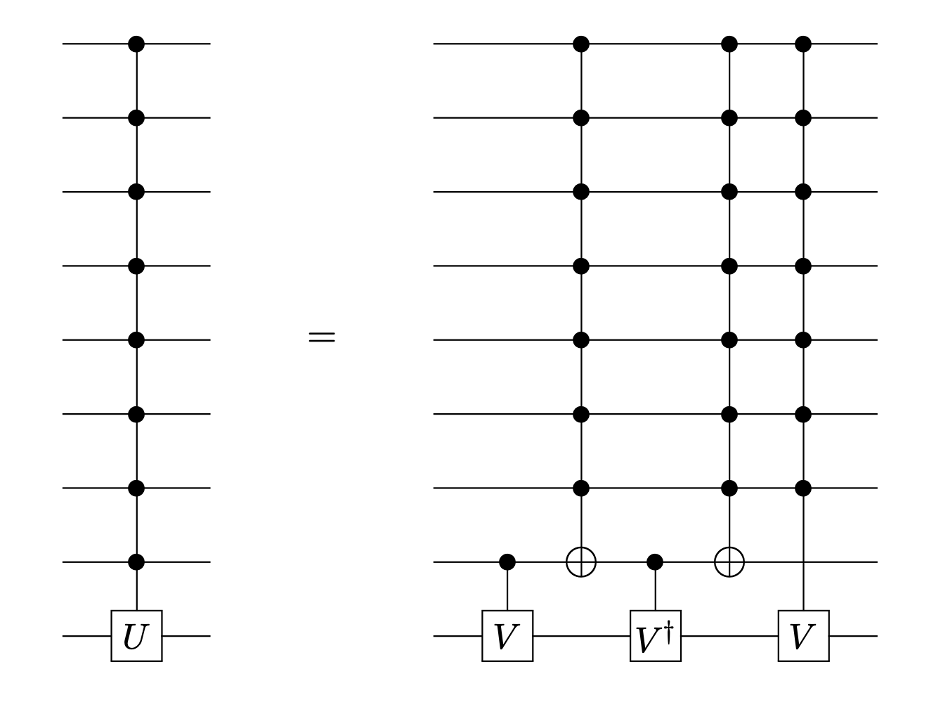

Previous lemmas and corollaries show that these can gates can be broken down further into smaller $C2X$ and $C3X$ gates.

$$\begin{align}C5X &= 12 \ C2X = 12\cdot34 = 408 \\ C7X &= 2 \ C5X + 2 \ C3X = 2\cdot408 + 2\cdot67 = 950 \\ C8X &= 3 \ C7X \end{align}$$

If we let use our implementation of $C2X$ and $C3X$. Then we would have the general cost of $C8X = 2850$. However, as our circuit allow for the use of phase differences, we would also allow this circuit to be used to built bigger examples like shown below.

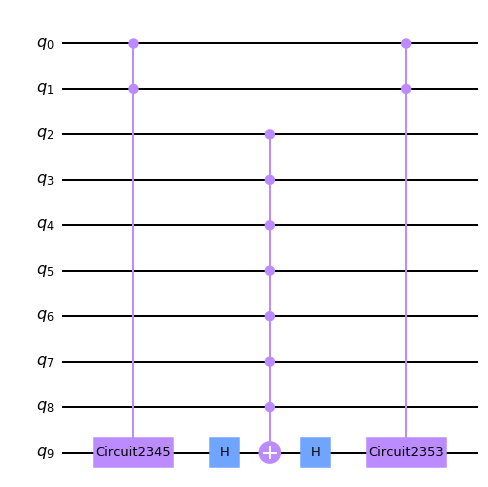

In [93]:
circ = q(10)
circ = control_unitary(circ, H, [0, 1], 9)
circ.h(9)
circ.mct([2, 3, 4, 5, 6, 7, 8], 9)
circ.h(9)
circ = control_unitary(circ, H, [0, 1], 9)

milk(circ)

The $3$ middle gates will have the effect of $C8Z$, and the two gate outside are $C2Z$. This will leads to $C10X$ with phase difference. Now we made one last modification to the implementation of Lemma 7.5. If we look back to the table from before, we can see that our implementation of $C7X$ has a lower than $950$. Because the phase difference does not affect the control operation, we can replace the paper's $C7X$ with ours.

In [100]:
print(1)
dtp(CnH(1), nice = False)
print('\n')
print(2)
dtp(CnH(2), nice = False)
print('\n')
print(3)
dtp(CnH(3), nice = False)

1
cx: 1
u3: 2
Total cost: 12


2
cx: 8
u3: 16
Total cost: 96


3
cx: 18
u3: 31
Total cost: 211


Using the $CnH$ implementation cost of $96$. The lower bound of the general cost of $C8X, C9X, C10X$ with and without phase difference are:

n | H-a  | Our Cost | Lower Bound
--- | --- | --- | ---
8 | 0 | 1163 | 2403
9 | 1 | 1656 | 2427
10 | 2 | 2506 | 2595
11 | 3 | 3495 | 2825

This conclusively shows that our technique is superior for $n = 8, 9, 10, 11$. It's easily provable that this supremacy holds for $n = 5, 6, 7$.

### References

1. https://arxiv.org/pdf/0803.2316.pdf
2. https://arxiv.org/pdf/1508.03273.pdf
3. https://arxiv.org/pdf/quant-ph/9503016.pdf
4. https://arxiv.org/abs/quant-ph/9508027